# 서울시 공유자전거 '따릉이' 수요 예측 프로젝트
## 단계2. 탐색적 데이터 분석

## 0.프로젝트 소개

### (1) 수행 목표 
여러분은 서울시 정책 연구원으로써 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

#### 우리가 풀어야 하는 문제는 무엇인가요?

 - 기상상황이 따릉이 수요에 주는 영향을 분석해봅시다.

    * 1.데이터를 탐색하며 정보 획득
        * 날씨 데이터와 서울시 공유 자전거 따릉이의 수요 데이터를 제공해드렸습니다. 
        * 우리는 따릉이의 수요와 날씨간 어떤 연관성이 있는지 탐색 해 봅시다.
    * 2.EDA
        * 주어진 데이터의 변수들을 분석해 봅시다. 


### (2) 데이터 소개

#### 1) 기본 데이터

        * 학습데이터 : sbikedata.csv

#### 2) 데이터셋의 변수 소개

        * date : 날짜
        * hour : 시간
        * temperature : 온도
        * precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
        * windspeed : 풍속(평균)
        * humidity : 습도
        * visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
        * ozone : 오존 수치
        * PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
        * PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
        * count : 시간에 따른 따릉이 대여 수


## 1.환경설정

* 세부 요구사항
    - 경로 설정 
        * 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정 및 라이브러리 로딩
* 이번 프로젝트는 로컬환경에서 진행합니다.

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
# path = 'C:/Users/User/'

#### 2) 라이브러리 로딩

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.



### (2) 데이터 불러오기
* 주어진 데이터셋
    * 따릉이 수요 및 날씨 데이터 : sbikedata.csv

#### 1) 데이터로딩

In [126]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

df = pd.read_csv('sbikedata.csv')

#### 2) 기본 정보 조회

In [127]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
#전체 데이터의 행,열 개수 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5725 non-null   float64
 3   PM2.5          5732 non-null   float64
 4   ozone          5699 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   int64  
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 500.9+ KB


In [128]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
#전체 데이터의 모든 변수 확인
df.columns

Index(['date', 'hour', 'PM10', 'PM2.5', 'ozone', 'temperature',
       'precipitation', 'windspeed', 'humidity', 'visibility', 'count'],
      dtype='object')

## 2.EDA 2단계 - 가설 설정

*  '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

    * 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

        - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
        - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

        로 가설이 자연스레 수립 됩니다.


### (1) 가설 수립
* 'precipitation' 변수를 포함하여, 최소 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요.
    * Guide : Target은 따릉이 대여량 입니다.


* 귀무가설 1: 온도와 따릉이 대여량간에는 관계가 없다.
* 대립가설 1: 온도와 따릉이 대여량간에는 관계가 있다.


* 귀무가설 2: 시간대와 대여량 관계 없음
* 대립가설 2: 시간대와 대여량 관계 있음


* 귀무가설 3: 미세먼지,초미세먼지와 대여량 관계 없음
* 대립가설 3: 미세먼지,초미세먼지와 대여량 관계 있음


* 귀무가설 4: 오존과 대여량 관계 없음
* 대립가설 4: 오존과 대여량 관계 있음


* 귀무가설 5: 풍속과 대여량 관계 없음
* 대립가설 5: 풍속과 대여량 관계 있음


## 3.EDA 3단계 - 이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    1. 시각화 : 그래프를 활용한 데이터 분석
    2. 수치화 : t-test, anova
    3. 관계 평가

#### 1) 강수 여부와 따릉이 대여량간 이변량 분석

In [129]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df['PM10'].fillna(method='ffill',inplace = True)
df['PM2.5'].fillna(method='ffill',inplace = True)
df['ozone'].fillna(method='ffill',inplace = True)

In [130]:
df.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30


1시간 전 비가 오지 않았을떄 (0 일때) 따릉이 대여 건수 평균이 100이상임

1시간 전 비가 왔을때 (1 일때) 따릉이 대여 건수는 매우 낮은 편임

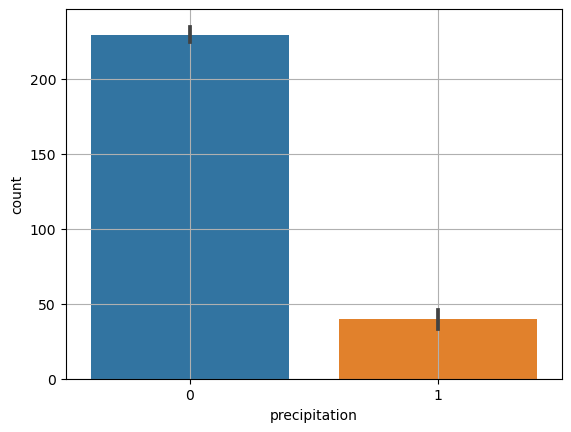

In [131]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.barplot(x = 'precipitation',y = 'count',data = df)
plt.grid()
plt.show()

In [132]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
rain = df.loc[df['precipitation']==0,'count']
no_rain = df.loc[df['precipitation']==1,'count']

In [133]:
result = spst.ttest_ind(rain,no_rain)
print(f'통계량: {result[0]}, p-vlaue:{result[1]}')

통계량: 21.389614151911022, p-vlaue:8.86239184041254e-98


In [134]:
"""
p-value가 0.05보다 훨씬 낮고, 통계량이 차이가 큼으로 유의미한 분석= 관련 있음
강수 여부가 대여량에 영향을 미친다.
"""

'\np-value가 0.05보다 훨씬 낮고, 통계량이 차이가 큼으로 유의미한 분석= 관련 있음\n강수 여부가 대여량에 영향을 미친다.\n'

* 귀무가설은 X가 Y와 관련이 없다. 
* 대립가설은 X와 Y가 관련이 있다.

* P-value (유의확률)가 0.05 이하라면? 해당 변수는 매우 유의미한 값으로 판단 가능함

### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)
* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    1. 시각화 : 그래프를 활용한 데이터 분석
    2. 수치화 : 상관분석
    3. 관계 평가

#### 1) 시간대별 대여량 분석

In [185]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df['day_night'] = pd.cut(df['hour'], bins = [0,7,20,23], 
                    labels =['morning','day','night'])

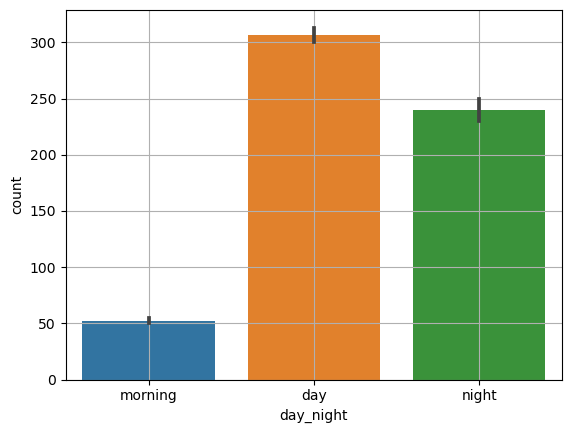

In [186]:
sns.barplot(x='day_night',y='count',data = df)
plt.grid()
plt.show()

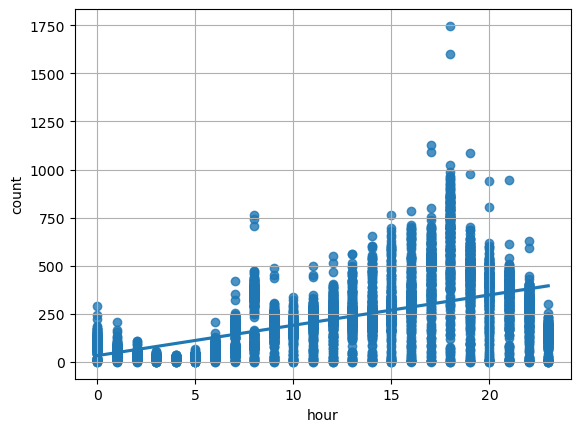

In [137]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.regplot(x= 'hour', y= 'count', data = df)
plt.grid()
plt.show()

In [138]:
result = spst.pearsonr(df_day['hour'],df_day['count'])
print(f'상관계수: {result[0]}, p-vlaue:{result[1]}')

상관계수: 0.4791673600924493, p-vlaue:4.4848765656395595e-181


In [139]:
"""
상관성이 높으며 주로 출근 시간 , 퇴근시간에 대여수가 높은것으로 보여진다 . 
"""

'\n상관성이 높으며 주로 출근 시간 , 퇴근시간에 대여수가 높은것으로 보여진다 . \n'

#### 2) 온도 데이터 분석

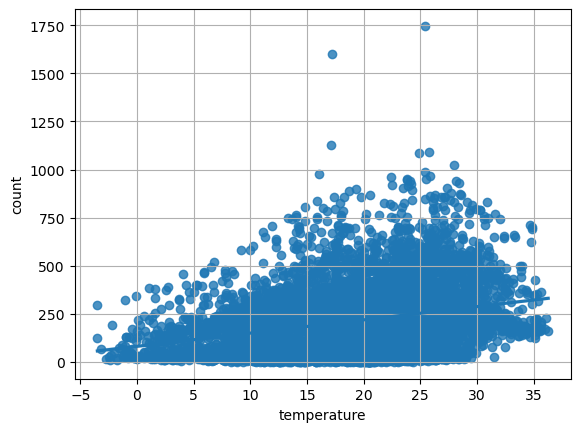

In [140]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
fig,ax = plt.subplots()
sns.regplot(x= 'temperature', y= 'count', data =df, ax = ax)
plt.grid()
plt.show()

In [141]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
result = spst.pearsonr(df_day['temperature'],df_day['count'])
print(f'상관계수: {result[0]}, p-vlaue:{result[1]}')

상관계수: 0.159349348501725, p-vlaue:2.0547181310531896e-19


#### 3) 풍속에 대한 분석

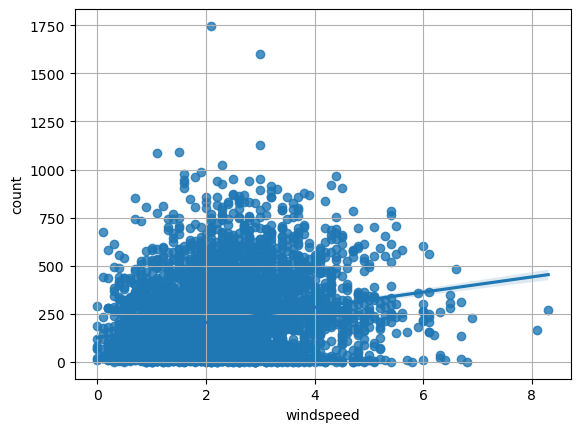

In [142]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.regplot(x='windspeed', y= 'count', data = df)
plt.grid()
plt.show()


In [143]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
result = spst.pearsonr(df_day['windspeed'],df_day['count'])
print(f'상관계수: {result[0]}, p-vlaue:{result[1]}')

상관계수: 0.07898824853625103, p-vlaue:8.800570544476364e-06


#### 4) 습도에 대한 예측

In [166]:
df['humidity_1'] = pd.cut(df['humidity'], bins = [-np.inf,40,70,np.inf], 
       labels =['dry','good','moist'])

In [172]:
df['humidity_1'].value_counts()

humidity_1
moist    2808
good     2634
dry       385
Name: count, dtype: int64

In [167]:
df.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,PM10_1,PM2.5_1,humidity_1
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,normal,Normal,good
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,normal,Normal,good
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,good,Good,good
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,good,Good,good
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,good,Good,good


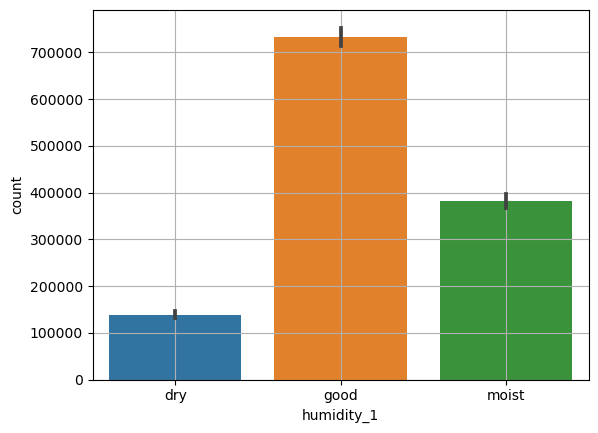

In [171]:
sns.barplot(x='humidity_1',y='count',estimator = sum,data = df)
plt.grid()
plt.show()

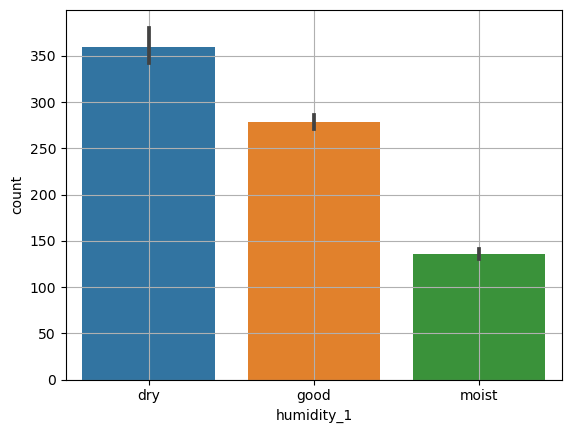

In [173]:
sns.barplot(x='humidity_1',y='count',data = df)
plt.grid()
plt.show()

In [170]:
dry = df.loc[df['humidity_1'] =='dry','count']
good =df.loc[df['humidity_1'] =='good','count']
moist = df.loc[df['humidity_1'] =='moist','count']
spst.f_oneway(dry,good,moist)

F_onewayResult(statistic=635.8227860910887, pvalue=1.7225194422974288e-250)

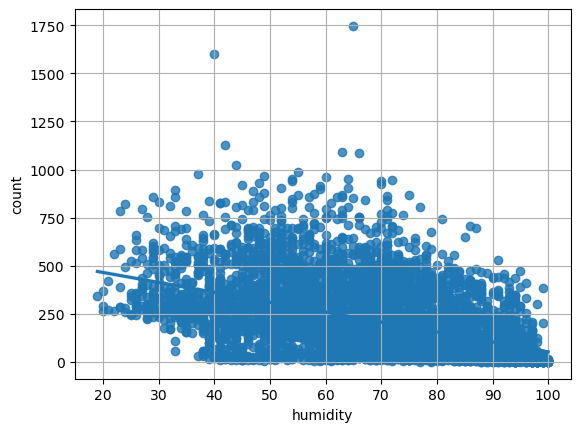

In [144]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.regplot(x='humidity', y= 'count', data = df)
plt.grid()
plt.show()

In [145]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
result = spst.pearsonr(df_day['humidity'],df_day['count'])
print(f'상관계수: {result[0]}, p-vlaue:{result[1]}')

상관계수: -0.38428782324110144, p-vlaue:1.0603735444092757e-111


#### 5) 시정에 대한 분석

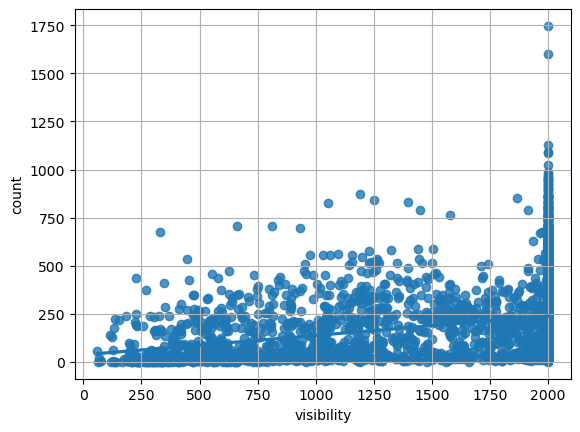

In [146]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.regplot(x='visibility', y= 'count', data = df)
plt.grid()
plt.show()

In [147]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
result = spst.pearsonr(df_day['visibility'],df_day['count'])
print(f'상관계수: {result[0]}, p-vlaue:{result[1]}')

상관계수: 0.31727628456192136, p-vlaue:8.227548136022993e-75


#### 6) 오존 데이터 분석

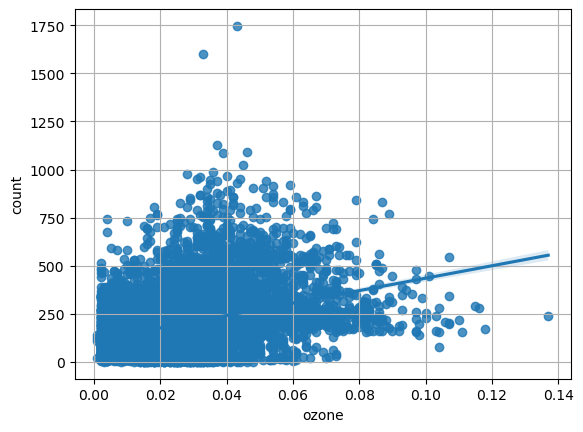

In [148]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.regplot(x='ozone', y= 'count', data = df)
plt.grid()
plt.show()

In [149]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
result = spst.pearsonr(df_day['ozone'],df_day['count'])
print(f'상관계수: {result[0]}, p-vlaue:{result[1]}')

상관계수: 0.1422605582434501, p-vlaue:9.47485752322572e-16


#### 7) 미세먼지 농도 데이터 분석

In [150]:
df['PM10_1'] = pd.cut(df['PM10'], bins = [-np.inf,30,80,150,np.inf], 
       labels =['good','normal','bad','very_bad'])

In [151]:
df['PM10_1'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   date           5827 non-null   object  
 1   hour           5827 non-null   int64   
 2   PM10           5827 non-null   float64 
 3   PM2.5          5827 non-null   float64 
 4   ozone          5827 non-null   float64 
 5   temperature    5827 non-null   float64 
 6   precipitation  5827 non-null   int64   
 7   windspeed      5827 non-null   float64 
 8   humidity       5827 non-null   int64   
 9   visibility     5827 non-null   int64   
 10  count          5827 non-null   int64   
 11  PM10_1         5827 non-null   category
dtypes: category(1), float64(5), int64(5), object(1)
memory usage: 506.8+ KB


In [152]:
df_sum = df.groupby('PM10_1',as_index=False)['count'].sum()
df_sum

,PM10_1,count
0,good,741274
1,normal,479849
2,bad,19911
3,very_bad,12458


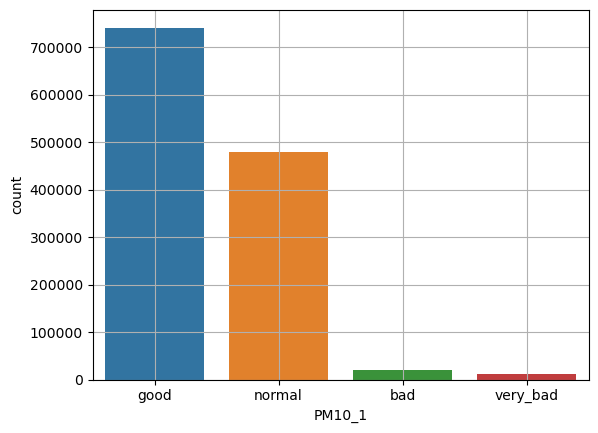

In [153]:
sns.barplot(x='PM10_1',y='count',data = df_sum, errorbar = None)
plt.grid()
plt.show()

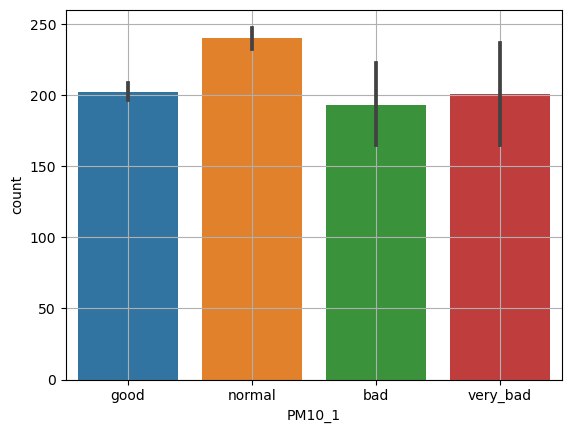

In [202]:
sns.barplot(x='PM10_1',y='count',estimator = np.mean, data = df)
plt.grid()
plt.show()

In [155]:
good = df.loc[df['PM10_1'] =='good','count']
normal =df.loc[df['PM10_1'] =='normal','count']
bad = df.loc[df['PM10_1'] =='bad','count']
very_bad =df.loc[df['PM10_1'] =='very_bad','count']
spst.f_oneway(good,normal,bad,very_bad)

F_onewayResult(statistic=18.30325074072805, pvalue=8.125495372567542e-12)

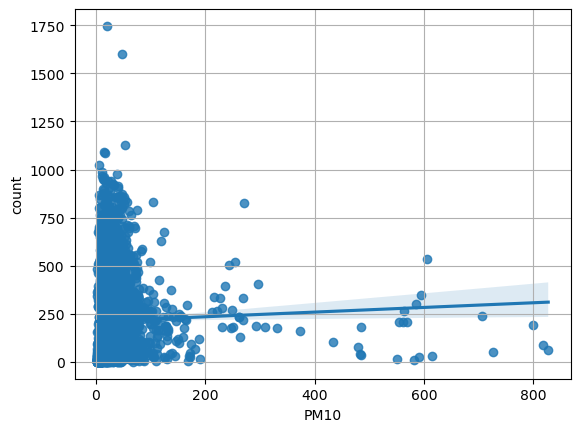

In [156]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.regplot(x='PM10', y= 'count', data = df)
plt.grid()
plt.show()

In [157]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
result = spst.pearsonr(df_day['PM10'],df_day['count'])
print(f'상관계수: {result[0]}, p-vlaue:{result[1]}')


상관계수: 0.009333981688580906, p-vlaue:0.599986400361586


#### 8) 초미세먼지 농도에 대한 분석

In [158]:
df['PM2.5_1']=pd.cut(df['PM2.5'],bins =[-np.inf,15,35,75,np.inf], 
       labels=['Good','Normal','Bad','Very_bad'] )
df.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,PM10_1,PM2.5_1
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,normal,Normal
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,normal,Normal
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,good,Good
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,good,Good
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,good,Good


In [159]:
df_sum_1 = df.groupby('PM2.5_1',as_index=False)['count'].sum()

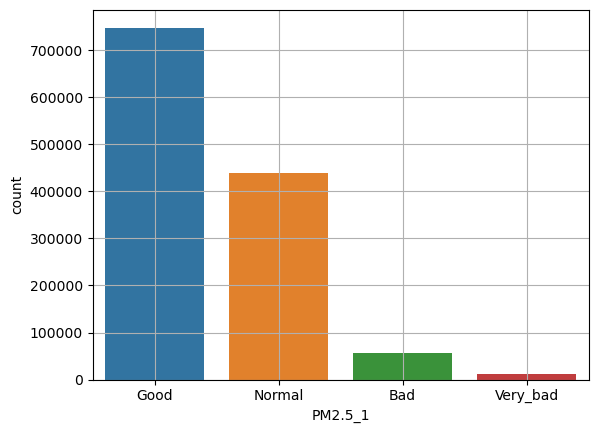

In [160]:
sns.barplot(x='PM2.5_1',y='count',data = df_sum_1, errorbar = None)
plt.grid()
plt.show()

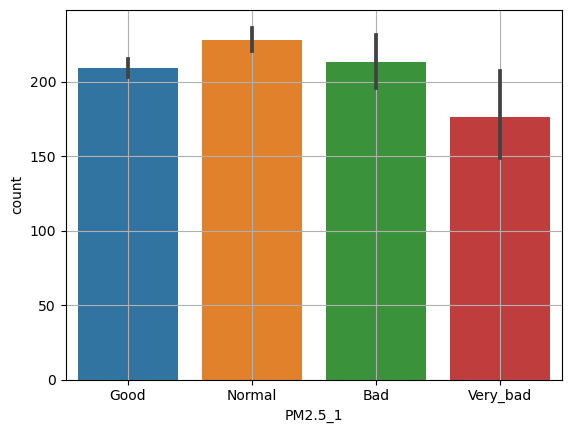

In [163]:
sns.barplot(x='PM2.5_1',y='count',estimator=np.mean , data = df)
plt.grid()
plt.show()

In [164]:
Good = df.loc[df['PM2.5_1'] =='Good','count']
Normal =df.loc[df['PM2.5_1'] =='Normal','count']
Bad = df.loc[df['PM2.5_1'] =='Bad','count']
Very_bad =df.loc[df['PM2.5_1'] =='Very_bad','count']
spst.f_oneway(Good,Normal,Bad,Very_bad)

F_onewayResult(statistic=5.24487862695421, pvalue=0.0012973508270159068)

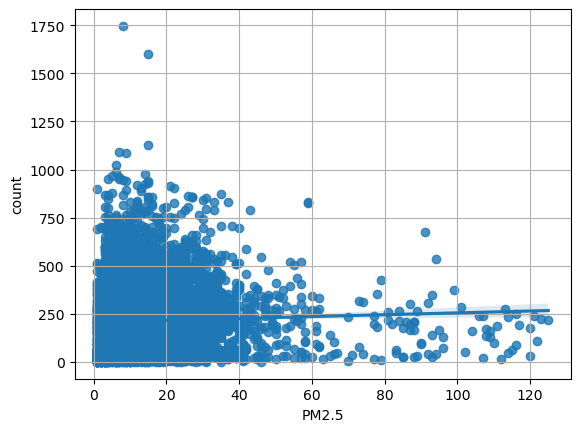

In [54]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.regplot(x='PM2.5', y= 'count', data = df)
plt.grid()
plt.show()


In [55]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
result = spst.pearsonr(df_day['PM2.5'],df_day['count'])
print(f'상관계수: {result[0]}, p-vlaue:{result[1]}')


상관계수: 0.025972251603439453, p-vlaue:0.144444489323507


## 4. 가설 검정

### 1. 강한 관계의 변수 (대립가설 채택) 
* 강수여부,시간대,습도,가시성,온도,오존, 풍속


### 2. 약한 관계의 변수
* 미세먼지, 초미세먼지

### 3. 관계 없는 변수 (귀무가설 채택)


## 5. Insight 도출
* 미세먼지,초 미세먼지가 좋은날은 상대적으로 대여량이 많지만 안좋은 날은 자료가 너무 적어서 신뢰성이 떨어진다. 
* 강수 여부가 자전거 대여에 강한 영향을 끼친다.
* 시간대 또한 자전거 대여여부에 영향을 미치는데 보통 출,퇴근시간에 대여량이 많다
* 습도가 너무 높은 날에는 자전거 대여량이 현저히 적으며 건조한날 평균적으로 많이 탄다.
* 가시성이 높고 날이 너무 추운 날보다는 적당히 선선한날 대여량이 많다
* 풍속이 약한날 자전거 대여량이 많다 . 

** 강수여부, 습도, 온도, 시간대 등에 따라 할인율을 적용하거나 혜택을 줘서 대여량을 증가 시킬 필요있음.

ex) 비가 오는날은 자전거 대여시 50프로 할인 들어가거나, 출퇴근 시간또한 마찬가지의 방법으로 자전거 대여량 늘리기 

## 추가

In [193]:
df['date'] = pd.to_datetime(df['date'])

In [194]:
df['month'] = df['date'].dt.month

In [203]:
df.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,PM10_1,PM2.5_1,humidity_1,day_night,month
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,normal,Normal,good,morning,4
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,normal,Normal,good,morning,4
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,good,Good,good,morning,4
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,good,Good,good,morning,4
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,good,Good,good,morning,4


In [206]:
df['month'].value_counts()

month
7     744
8     744
10    744
5     743
6     720
9     718
4     717
11    697
Name: count, dtype: int64

<Axes: xlabel='month', ylabel='count'>

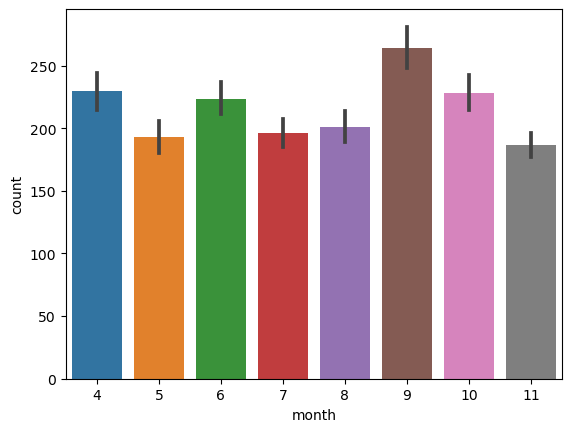

In [204]:
sns.barplot(x='month',y = 'count',data = df)

In [ ]:
"""
계절별로 나눠서 여름에 습도가 높을 것이다 . 
습도가 높은 날에는 대여량이 낮다 -> 여름에도 대여량이 낮을것이다
"""

In [218]:
df['season'] = pd.cut(df['month'],bins = [3,6,9,11], labels = ['spring','summer','autom'])

In [219]:
df.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,PM10_1,PM2.5_1,humidity_1,day_night,month,season
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,normal,Normal,good,morning,4,spring
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,normal,Normal,good,morning,4,spring
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,good,Good,good,morning,4,spring
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,good,Good,good,morning,4,spring
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,good,Good,good,morning,4,spring


In [221]:
df['season'].value_counts()

season
summer    2206
spring    2180
autom     1441
Name: count, dtype: int64

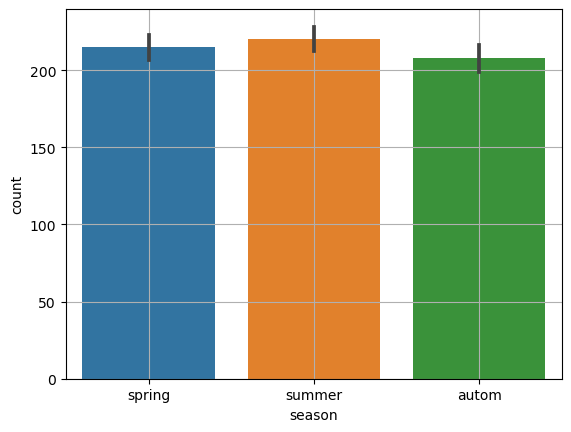

In [222]:
sns.barplot(x='season',y='count',data = df)
plt.grid()
plt.show()

## 습도와 계절

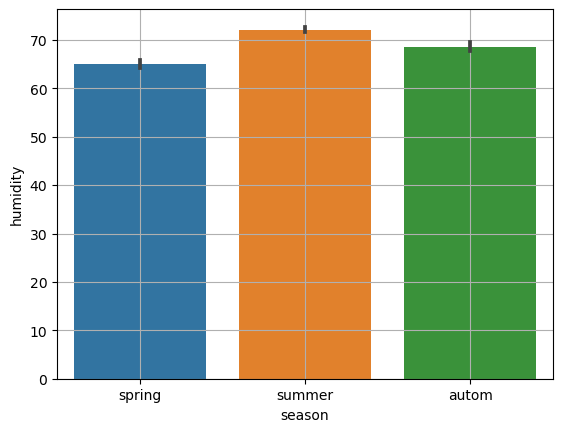

In [224]:
sns.barplot(x='season',y='humidity',data = df)
plt.grid()
plt.show()

In [226]:
pd.crosstab(df['season'],df['humidity_1'])

humidity_1,dry,good,moist
season,,,
spring,288,945,947
summer,9,1021,1176
autom,88,668,685


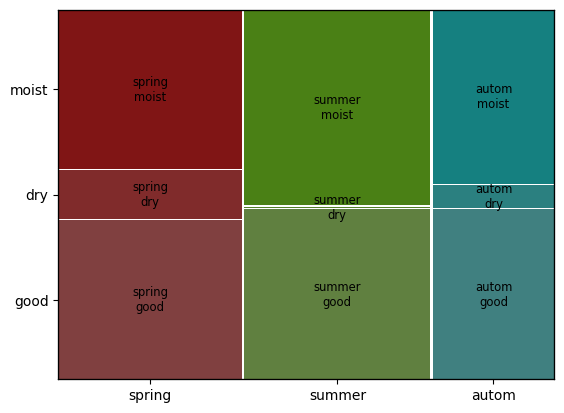

In [229]:
mosaic(df,['season','humidity_1'])
#plt.axhline
plt.show()

In [ ]:
"""
여름에는 습도가 높다 
습도와 자전거 대여를 봤을때 습도가 높은 날은 대여가 적다 
근데 여름에 평균 자전거 대여량이 가장 많다.
그럼 습도가 높은날에는 자전거 대여를 안하지만 다른 변수가 자전거를 대여하는데 기여한다
습도랑 계절이랑 큰 연관성이 없다 . 
"""

In [239]:
df_1 = df[['date','hour','PM10','PM2.5','ozone','temperature','windspeed','humidity','visibility','count']]

In [240]:
df_1.corr()

,date,hour,PM10,PM2.5,ozone,temperature,windspeed,humidity,visibility,count
date,1.000000,-0.001472,-0.122395,-0.026610,-0.256342,-0.183763,-0.132189,0.150635,0.023767,0.000854
hour,-0.001472,1.000000,0.043086,0.047352,0.224182,0.190606,0.220301,-0.304287,0.088881,0.586435
PM10,-0.122395,0.043086,1.000000,0.684523,-0.004608,-0.127791,0.043020,-0.090463,-0.286346,0.027815
PM2.5,-0.026610,0.047352,0.684523,1.000000,0.013609,-0.111950,-0.136519,-0.039257,-0.429727,0.035737
ozone,-0.256342,0.224182,-0.004608,0.013609,1.000000,0.540443,0.332868,-0.401787,0.152814,0.317526
temperature,-0.183763,0.190606,-0.127791,-0.111950,0.540443,1.000000,0.051311,-0.092162,0.143919,0.277169
windspeed,-0.132189,0.220301,0.043020,-0.136519,0.332868,0.051311,1.000000,-0.292127,0.084418,0.223722
humidity,0.150635,-0.304287,-0.090463,-0.039257,-0.401787,-0.092162,-0.292127,1.000000,-0.487472,-0.478955
visibility,0.023767,0.088881,-0.286346,-0.429727,0.152814,0.143919,0.084418,-0.487472,1.000000,0.265828
count,0.000854,0.586435,0.027815,0.035737,0.317526,0.277169,0.223722,-0.478955,0.265828,1.000000
